In [43]:
import numpy as np
import pandas as pd

import seaborn as sns

In [5]:
anomalies = pd.read_csv('anomaly_list.csv')

In [6]:
def get_esb(anomaly):
    esb = pd.read_csv(anomaly['folder'] + '/esb.csv')
    return esb
    
def get_trace(anomaly):
    trace = pd.read_csv(anomaly['folder'] + '/trace.csv')
    return trace

def get_host(anomaly):
    host = pd.read_csv(anomaly['folder'] + '/host.csv')
    return host

### ESB and Host / KPI information for Faults

In [24]:
def print_fault_esb():
    for fault in anomalies['fault'].unique():
        print('*'*40)
        print(fault)
        for row_index in range(len(anomalies)):
            anomaly = anomalies.iloc[row_index,:]
            if anomaly['fault'] == fault:
                print('-'*40)
                print(anomaly['host'], anomaly['kpi'])
                print(get_esb(anomalies.iloc[row_index,:]).tail())  
                

In [25]:
print_fault_esb()

****************************************
CPU fault
----------------------------------------
docker_003 container_cpu_used
   serviceName      startTime  avg_time  num  succee_num  succee_rate
10     osb_001  1586534820000   17.0701    8           8       1.0000
11     osb_001  1586534880000    5.0794  133         133       1.0000
12     osb_001  1586534940000    3.9917   71          70       0.9859
13     osb_001  1586534940000   72.6047   10           6       0.6000
14     osb_001  1586535000000    1.2715  379         376       0.9921
----------------------------------------
docker_004 container_cpu_used
   serviceName      startTime  avg_time  num  succee_num  succee_rate
29     osb_001  1586540580000    4.1229  123         123       1.0000
30     osb_001  1586540580000   15.1241    9           9       1.0000
31     osb_001  1586540640000    7.2725  102          98       0.9608
32     osb_001  1586540700000    1.3557  352         349       0.9915
33     osb_001  1586540700000    1.55

   serviceName      startTime  avg_time  num  succee_num  succee_rate
29     osb_001  1586548620000   47.1170    2           2          1.0
30     osb_001  1586548680000    0.8491  410         410          1.0
31     osb_001  1586548740000    0.7924  425         425          1.0
32     osb_001  1586548740000   62.0950    1           1          1.0
33     osb_001  1586548800000    0.5588  433         433          1.0
----------------------------------------
docker_007 nan
   serviceName      startTime  avg_time  num  succee_num  succee_rate
31     osb_001  1586552820000    0.0000    9           0       0.0000
32     osb_001  1586552880000    1.9993  259         207       0.7992
33     osb_001  1586552940000    1.2546  348         348       1.0000
34     osb_001  1586552940000   20.8780   10          10       1.0000
35     osb_001  1586553000000    0.6161  545         545       1.0000
----------------------------------------
os_021 Sent_queue;Received_queue
   serviceName      startTime 

General Findings:
- No discriminatory information in esb on fault types
- Thresholds on avg_time and succee_rate will caputer all anomalies

CPU Fault's:
- Always in docker host's and container_cpu_used

Network Delay:
- Always in docker or os
- Docker fault's have no kpi's
- Os faults are always Sent_queue and Received_queue

Network Loss:
- Either in docker or os
- If in docker no kpi's
- If in os Sent_queue;Received_queue

DB Connection Limit:
- Always in db
- Always with Proc_User_Used_Pct;Proc_Used_Pct;Sess_Connect

DF Close:
- Always in db
- Always with On_Off_State;tnsping_result_time

In [37]:
def get_rel_kpi(anomaly):
    kpi = get_host(anomaly)
    if anomaly.fault == 'CPU fault':
        kpi = kpi[(kpi.name == 'container_cpu_used')]
    elif anomaly.fault == 'db connection limit':
        kpi = kpi[(kpi.name == 'Proc_User_Used_Pct') or (kpi.name == '')]
    return kpi

def plot_rel_kpis(anomaly):
    kpi = get_host(anomaly)
    

         timestamp  value
20   1586534428000    1.0
350  1586534727000   12.0
351  1586534642000    2.0
352  1586534582000    1.0
353  1586534548000    2.0
354  1586534488000    2.0
520  1586534961000   98.0
521  1586534886000   98.0
522  1586534787000    1.0
          timestamp  value
587   1586539346000    1.0
588   1586539286000   10.0
794   1586539824000    2.0
795   1586539764000    2.0
796   1586539704000    2.0
797   1586539644000    1.0
798   1586539562000    2.0
1154  1586540126000    2.0
1155  1586540042000    1.0
1156  1586540005000    2.0
1157  1586539946000    1.0
1158  1586539885000    1.0
1794  1586540426000    1.0
1795  1586540366000    1.0
1796  1586540305000    1.0
1797  1586540246000    1.0
1798  1586540185000    1.0
1888  1586540645000  101.0
1889  1586540577000   99.0
1890  1586540485000    2.0
          timestamp  value
468   1586543556000    2.0
469   1586543497000    2.0
920   1586544035000    2.0
921   1586543976000    1.0
922   1586543883000    2.0
923   15865

          timestamp  value
700   1590868928000    2.0
759   1590868968000    2.0
817   1590869019000   37.0
921   1590869109000    2.0
975   1590869150000   13.0
1085  1590869237000    2.0
1139  1590869289000   12.0
1184  1590869319000   20.0
1274  1590869379000   21.0
1355  1590869469000    2.0
1386  1590869499000   37.0
1512  1590869589000    2.0
1566  1590869640000    2.0
1620  1590869679000   11.0
1702  1590869763000   12.0
1711  1590869769000    4.0
1810  1590869860000   30.0
1882  1590869919000   45.0
2000  1590870013000   45.0
2062  1590870075000   50.0


<AxesSubplot:xlabel='timestamp', ylabel='value'>

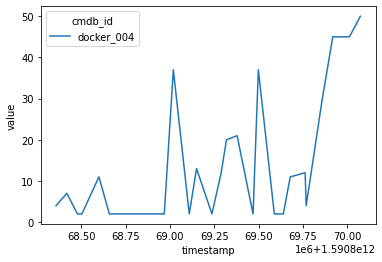

In [46]:
for row_index in range(len(anomalies)):
    anomaly = anomalies.iloc[row_index,:]
    if anomaly['fault'] == 'CPU fault':
        rel_kpi = get_cf_kpi(anomaly)
        print(rel_kpi[['timestamp','value']].tail(20))


docker_003


<AxesSubplot:xlabel='timestamp', ylabel='value'>

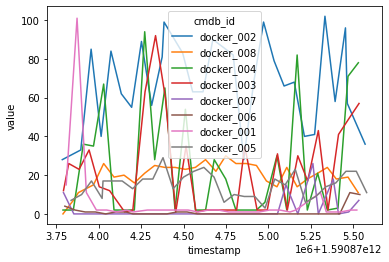

In [49]:
all_hosts = get_host(anomaly)
all_hosts = all_hosts[all_hosts.name == 'container_cpu_used']
print(anomaly['host'])
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=all_hosts)

In [50]:
for host in all_hosts['cmdb_id'].unique():
    all_hosts[all_host['']]
all_hosts['value'] = (all_hosts['value'] - all_hosts['value'].mean())/(all_hosts['value'].std())

<AxesSubplot:xlabel='timestamp', ylabel='value'>

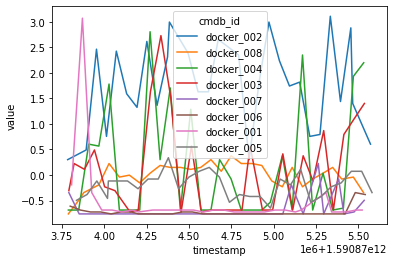

In [51]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=all_hosts)